In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/abhay/Desktop/Probation/Probation-Project-25/Abhay_Pratap_Singh_Task_8/AdultIncome - Sheet1.csv')
print(df.head())
print(df.info())
print(df.describe())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
cat_value = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
num_value = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [6]:
target = 'income'
X = df.drop(target, axis=1)
y = df[target]
print(X.head())
print(y.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country  
0          4356              40  United-States  
1          4356              18  United-States  
2          

In [7]:
X = pd.get_dummies(X, columns=cat_value, drop_first=True)
y = y.map({'<=50K': 0, '>50K': 1})
print(X.head())
print(y.head())

   age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native.country_Portugal  \
0              False  ...                   

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.17780667  0.17324388 -0.03649105 ...  0.34223507 -0.0447248
  -0.02318962]
 [-0.99324468  0.01823791  1.13074461 ...  0.34223507 -0.0447248
  -0.02318962]
 [-0.99324468 -0.09236999 -0.42556961 ...  0.34223507 -0.0447248
  -0.02318962]
 ...
 [-0.92005397 -1.30388022 -0.81464816 ...  0.34223507 -0.0447248
  -0.02318962]
 [ 0.39737879 -0.70533743  1.51982317 ...  0.34223507 -0.0447248
  -0.02318962]
 [ 0.03142525  0.32628501 -0.42556961 ...  0.34223507 -0.0447248
  -0.02318962]]
[[ 1.2756673   0.798076   -1.98188383 ...  0.34223507 -0.0447248
  -0.02318962]
 [-1.43238893  0.44837028 -0.42556961 ...  0.34223507 -0.0447248
  -0.02318962]
 [-1.1396261  -0.60928644 -0.03649105 ... -2.92196821 22.35895966
  -0.02318962]
 ...
 [-0.55410042 -0.78629308  0.3525875  ...  0.34223507 -0.0447248
  -0.02318962]
 [ 0.17780667  0.12168543 -1.59280527 ...  0.34223507 -0.0447248
  -0.02318962]
 [-0.11495617 -0.27280567  1.13074461 ...  0.34223507 -0.0447248
  -0.02318962]]


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_prob

array([0.01856253, 0.00073523, 0.00116337, ..., 0.57225903, 0.01337492,
       0.05127823], shape=(6513,))

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8496852448948258


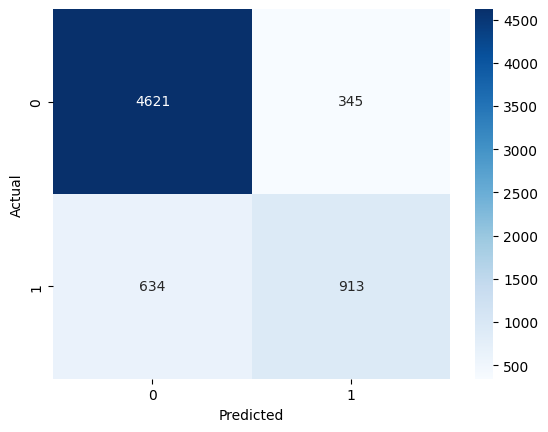

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4966
           1       0.73      0.59      0.65      1547

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



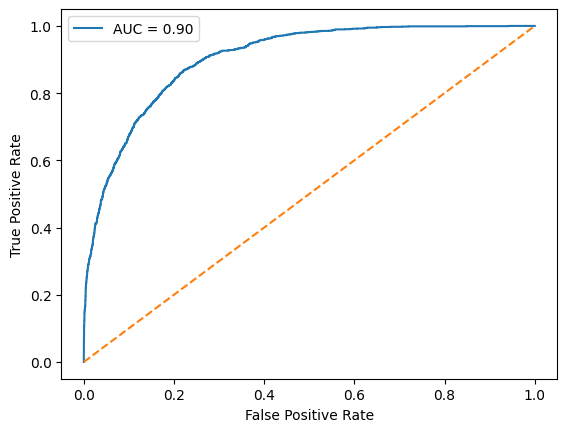

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [16]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coeff_df)

                              Feature  Coefficient
3                        capital.gain     2.394966
30  marital.status_Married-civ-spouse     1.034041
2                       education.num     0.513983
58                           sex_Male     0.410453
5                      hours.per.week     0.382477
..                                ...          ...
26                education_Preschool    -0.172679
42           occupation_Other-service    -0.176438
43         occupation_Priv-house-serv    -0.251966
32       marital.status_Never-married    -0.258422
51             relationship_Own-child    -0.316949

[100 rows x 2 columns]
